<a href="https://colab.research.google.com/github/Big-Stanz/NLP-Machine-Translation/blob/main/Sentiment_Analysis_1_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Loading  The Tweets Dataset**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)

In [ ]:
data = pd.read_csv('/content/Tweets.csv')
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# **2.Dataset Exploration**

In [ ]:
#Checking the Dimensions of the Dataset
data.shape

(14640, 15)

In [ ]:
#Checking the Summary of the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [ ]:
# Checking for missing values
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
# Removing the unnecessary Columns
# data.drop(['user_timezone','tweet_created','tweet_coord','retweet_count','negativereason_gold','airline_sentiment_gold',], axis=1, inplace=True)
data.drop(["id"], axis=1, inplace=True)
data.head()

,label,tweet
0,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [ ]:
# Removing  columns
data.drop(['tweet_id','tweet_location'], axis=1, inplace=True)
data.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,text
0,neutral,1.0000,NaN,NaN,Virgin America,cairdin,@VirginAmerica What @dhepburn said.
1,positive,0.3486,NaN,0.0000,Virgin America,jnardino,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,@VirginAmerica and it's a really big bad thing about it


In [ ]:
data.drop(['airline_sentiment_confidence','negativereason','negativereason_confidence'], axis=1, inplace=True)
data.head()

,airline_sentiment,airline,name,text
0,neutral,Virgin America,cairdin,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,jnardino,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,Virgin America,yvonnalynn,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,Virgin America,jnardino,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,Virgin America,jnardino,@VirginAmerica and it's a really big bad thing about it


In [ ]:
data.head(30)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,"@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP",NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


##**Checking for the class balance**
##returns a Series object that contains the counts of each unique value in the text column.

In [ ]:
data['airline_sentiment'].value_counts(normalize=True)

negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64

<Axes: xlabel='airline_sentiment', ylabel='count'>

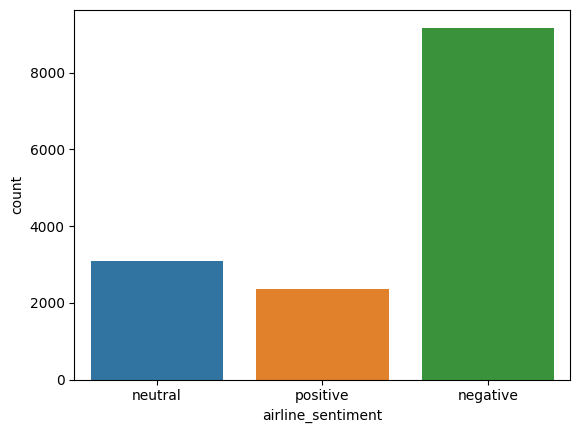

In [ ]:
!pip install seaborn
import seaborn as sns
sns.countplot(x='airline_sentiment', data = data)

<Axes: >

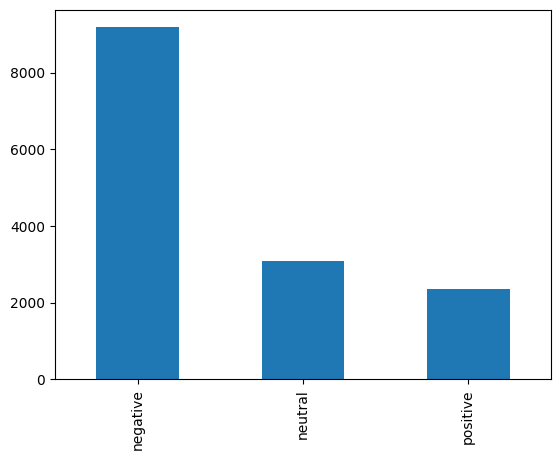

In [ ]:
# plot the label counts
data['airline_sentiment'].value_counts().plot(kind='bar')

# **3. Data Cleaning**

#*Processing_Text_Function*

# Cleaning of the text,leaving only 2 or more char long non-stopwords composed of A-Z & a-z only in lower case

In [ ]:
def remove_tags(sentence):
  """
  Removes html tags from a sentence.

  Args:
    sentence: The sentence to remove tags from.

  Returns:
    The sentence with the tags removed.
  """

  return re.sub('<[^<]+?>', '', sentence)


!pip install re

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [ ]:
def preprocess_text(sen):

    sentence = sen.lower()

    # Removing html tags
    sentence = remove_tags(sentence)

    # Removing punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Removing Single characters
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    # Removing Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)

    return sentence

In [ ]:
def preprocess_text(sentence):
  """
  Preprocess the text by removing HTML tags, punctuations, and numbers.

  Args:
    sentence: The sentence to preprocess.

  Returns:
    The preprocessed sentence.
  """

  # Remove html tags
  sentence = re.sub('<[^<]+?>', '', sentence)

  # Remove punctuations and numbers
  sentence = re.sub('[^a-zA-Z]', ' ', sentence)

  return sentence.strip()

##Calling the preprocessing_text functon on the tweets.csv dataset

In [ ]:
import re
X = []
sentences = list(data['text'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
X[24]

'VirginAmerica you guys messed up my seating   I reserved seating with my friends and you guys gave my seat away       I want free internet'

In [ ]:
data["text"][44]

'@VirginAmerica are flights leaving Dallas for Seattle on time Feb 24?'

In [ ]:
X[44]

'VirginAmerica are flights leaving Dallas for Seattle on time Feb'

In [ ]:
import numpy as np

y = data['text']

y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
# Embedding layer expects the words to be in numeric form
# Using Tokenizer function from keras.preprocessing.text library
# Method fit_on_text trains the tokenizer
# Method texts_to_sequences converts sentences to their numeric form

!pip install keras
from keras.preprocessing.text import one_hot,Tokenizer
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [ ]:
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist

vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

12085

In [ ]:
# Padding all reviews to fixed length 100
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/a2_glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [ ]:
# Create Embedding Matrix having 100 columns
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix.shape

(12085, 100)

In [ ]:
from tensorflow.keras.layers import LSTM


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Your code using Dense goes here


In [ ]:
# Neural Network architecture
#!pip install --upgrade keras tensorflow
#from tensorflow.keras.layers import Embedding
#from keras.layers.embeddings import Embedding
from keras.layers import Embedding
!pip install keras-layers-embeddings
import keras.models
#import keras.layers.Embeddings
lstm_model = keras.models.Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))

ERROR: Could not find a version that satisfies the requirement keras-layers-embeddings (from versions: none)
ERROR: No matching distribution found for keras-layers-embeddings


In [ ]:
# Model compiling

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1208500   
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1325877 (5.06 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 1208500 (4.61 MB)
_________________________________________________________________
None


In [ ]:
lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
74/74 [==============================] - 30s 376ms/step - loss: 0.0768 - acc: 0.9947 - val_loss: 2.2183e-05 - val_acc: 1.0000
Epoch 2/10
74/74 [==============================] - 24s 326ms/step - loss: 1.8700e-05 - acc: 1.0000 - val_loss: 1.5640e-05 - val_acc: 1.0000
Epoch 3/10
74/74 [==============================] - 26s 354ms/step - loss: 1.3482e-05 - acc: 1.0000 - val_loss: 1.1538e-05 - val_acc: 1.0000
Epoch 4/10
74/74 [==============================] - 28s 374ms/step - loss: 1.0159e-05 - acc: 1.0000 - val_loss: 8.9043e-06 - val_acc: 1.0000
Epoch 5/10
74/74 [==============================] - 24s 329ms/step - loss: 7.9875e-06 - acc: 1.0000 - val_loss: 7.1381e-06 - val_acc: 1.0000
Epoch 6/10
74/74 [==============================] - 29s 397ms/step - loss: 6.4966e-06 - acc: 1.0000 - val_loss: 5.8928e-06 - val_acc: 1.0000
Epoch 7/10
74/74 [==============================] - 25s 333ms/step - loss: 5.4235e-06 - acc: 1.0000 - val_loss: 4.9762e-06 - val_acc: 1.0000
Epoch 8/10
74/74 

In [ ]:
# Predictions on the Test Set

score = lstm_model.evaluate(X_test, y_test, verbose=1)

92/92 [==============================] - 11s 116ms/step - loss: 3.2897e-06 - acc: 1.0000


In [ ]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 3.2896737138798926e-06
Test Accuracy: 1.0


In [ ]:
from sklearn.metrics import classification_report

# Generate predictions on your test set
y_pred = lstm_model.predict(X_test)  # Replace 'model' with your trained LSTM model
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate and print the classification report
print(classification_report(y_test, y_pred_classes))


92/92 [==============================] - 7s 68ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2928

    accuracy                           1.00      2928
   macro avg       1.00      1.00      1.00      2928
weighted avg       1.00      1.00      1.00      2928



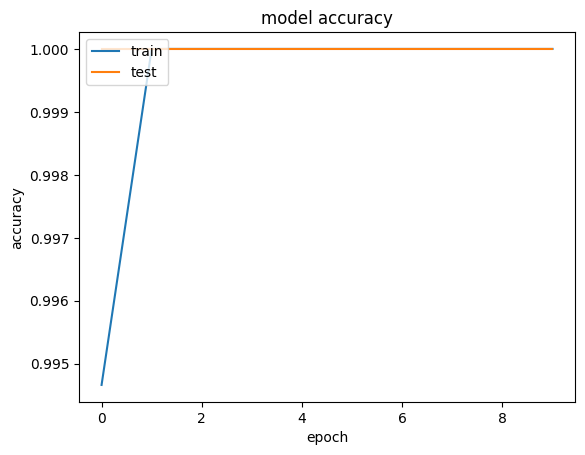

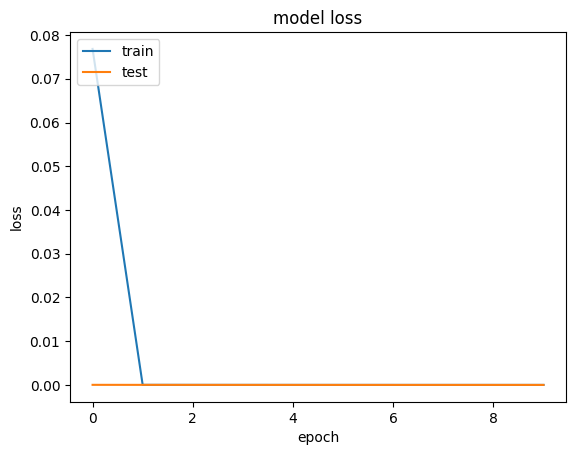

In [ ]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
# Saving the model as a h5 file for possible use later

lstm_model.save(f"./c1_lstm_model_acc_{round(score[1], 3)}.h5", save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!ls

a1_IMDB_Dataset.csv   a3_IMDb_Unseen_Reviews.csv  drive        tweets.csv
a2_glove.6B.100d.txt  c1_lstm_model_acc_1.0.h5	  sample_data  Tweets.csv


In [ ]:
# # Load previously trained LSTM Model
from keras.models import load_model

model_path ='/content/c1_lstm_model_acc_1.0.h5'
pretrained_lstm_model = load_model(model_path)

# Summarize model
pretrained_lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          1208500   
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1325877 (5.06 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 1208500 (4.61 MB)
_________________________________________________________________


In [ ]:
# Load sample IMDb reviews csv, having ~6 movie reviews, along with their IMDb rating

sample_reviews = pd.read_csv("a3_IMDb_Unseen_Reviews.csv")

sample_reviews.head(6)

,Unnamed: 0,Movie,Review Text,IMDb Rating
0,0,Ex Machina,"Intelligent Movie.\nThis movie is obviously allegorical, a fascinating tale about AI, but it is mainly about manipulation and power. It isn't for those wanting action or spectacular CGI, the movie...",9
1,1,Ex Machina,"Extraordinary and thought-provoking.\n'Ex machina' is surprisingly dense, more so than other titles Alex Garland has written, perhaps excepting only 'Annihilation.' The simple concept is given a d...",10
2,2,Ex Machina,"Poor story, only reasonable otherwise.\nIf I had realised this was by Alex Garland I would not have bothered watching. I remember reading his book the Beach years ago and thinking 'there's somethi...",3
3,3,Ex Machina,"Had Great Potential.\nThis movie is one of the countless that have come out of Hollywood that had great potential.\n\nHowever, like so many personalities in Hollywood, it sold it's soul for a chea...",1
4,4,Eternals,"Amazing visuals and philosophical concepts!\n\nNot only is the Eternals a visual masterpiece, the inner challenges each of the eternals face is a great signifier of the MCU moving into a more matu...",10
5,5,Eternals,"Worst MCU film ever\n\nFollowing the events of Avengers: Endgame (2019), an unexpected tragedy forces the Eternals, ancient aliens who have been living on Earth in secret for thousands of years, o...",3


In [ ]:
# Preprocess review text with earlier defined preprocess_text function

unseen_reviews = sample_reviews['Review Text']

unseen_processed = []
for review in unseen_reviews:
  review = preprocess_text(review)
  unseen_processed.append(review)

In [ ]:
# Tokenising instance with earlier trained tokeniser
unseen_tokenized = word_tokenizer.texts_to_sequences(unseen_processed)

# Pooling instance to have maxlength of 100 tokens
unseen_padded = pad_sequences(unseen_tokenized, padding='post', maxlen=maxlen)

In [ ]:
# Passing tokenised instance to the LSTM model for predictions
unseen_sentiments = lstm_model.predict(unseen_padded)

unseen_sentiments

1/1 [==============================] - 0s 32ms/step


array([[3.0165570e-06],
       [2.9484381e-06],
       [3.1924205e-06],
       [3.0300910e-06],
       [3.4391717e-06],
       [2.7639969e-06]], dtype=float32)

In [ ]:
# Stop words Removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk_stopwords = set(stopwords.words('english'))
print(nltk_stopwords)

{'more', 'wouldn', "you'll", 'shan', 'having', 'in', 'doesn', 'yours', 'it', 'about', 'after', 'under', 'have', 'isn', 'am', "aren't", 'should', 'him', 've', 'your', 'then', 'mightn', "weren't", 'herself', 'is', 'with', "mustn't", 't', 'was', 'i', 'won', "haven't", 're', 'o', 'now', 'over', 'theirs', 'only', 'myself', 'were', 'themselves', 'does', 'into', 'such', 'how', 's', "should've", 'each', "don't", 'do', 'y', 'who', 'until', "didn't", 'couldn', 'while', "hadn't", 'below', "wasn't", 'for', 'here', "won't", 'being', 'her', 'hadn', 'she', 'some', 'needn', 'hers', 'me', "that'll", 'itself', "hasn't", 'been', 'so', 'wasn', "mightn't", 'further', 'don', 'yourself', 'yourselves', 'same', "you've", 'this', 'off', 'its', 'the', 'most', 'ain', 'not', 'if', 'during', 'them', 'by', 'again', 'ma', 'a', 'we', 'aren', 'from', 'on', 'which', 'that', 'whom', 'there', "she's", 'our', 'what', 'their', 'can', 'because', 'didn', 'shouldn', 'or', 'had', 'too', "couldn't", 'other', 'just', "wouldn't", 

In [ ]:
len(nltk_stopwords)

179

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'more', 'next', 'would', 'besides', 'could', 'de', 'about', 'yours', 'it', 'former', 'am', 'seeming', 'him', 'then', 'herself', 'give', 'was', 'though', 'i', 're', 'nothing', 'found', 'now', 'whether', 'get', 'thereupon', 'system', 'serious', 'co', 'two', 'formerly', 'namely', 'might', 'how', 'who', 'until', 'either', 'ltd', 'eight', 'nine', 'anyway', 'hereby', 'below', 'much', 'her', 'afterwards', 'describe', 'hers', 'me', 'somewhere', 'although', 'find', 'neither', 'something', 'thus', 'so', 'least', 'seem', 'thick', 'yourself', 'twenty', 'hence', 'cannot', 'off', 'its', 'most', 'the', 'cant', 'fifty', 'already', 'therefore', 'nevertheless', 'them', 'elsewhere', 'hereafter', 'inc', 'whither', 'that', 'every', 'there', 'our', 'what', 'someone', 'whereas', 'often', 'because', 'whereupon', 'or', 'had', 'twelve', 'among', 'without', 'out', 'my', 'fill', 'meanwhile', 'they', 'last', 'go', 'alone', 'up', 'becoming', 'thence', 'un', 'throughout', 'nobody', 'nowhere', 'almost', 'everything'

In [ ]:
len(sklearn_stopwords)

318

In [ ]:
# Find the common stopwords from NLTK & sklearn
print(nltk_stopwords.intersection(sklearn_stopwords))

{'more', 'in', 'yours', 'about', 'it', 'after', 'under', 'have', 'am', 'should', 'him', 'your', 'then', 'herself', 'is', 'with', 'was', 'i', 're', 'now', 'over', 'only', 'myself', 'were', 'themselves', 'into', 'such', 'how', 'each', 'do', 'who', 'until', 'while', 'below', 'for', 'here', 'being', 'her', 'she', 'some', 'hers', 'me', 'itself', 'been', 'so', 'further', 'yourself', 'yourselves', 'same', 'this', 'off', 'its', 'the', 'most', 'not', 'if', 'during', 'them', 'by', 'again', 'a', 'we', 'from', 'on', 'which', 'that', 'whom', 'there', 'our', 'what', 'their', 'can', 'because', 'or', 'had', 'too', 'other', 'out', 'himself', 'my', 'be', 'before', 'why', 'down', 'will', 'has', 'few', 'they', 'no', 'up', 'between', 'you', 'against', 'all', 'he', 'both', 'but', 'once', 'above', 'through', 'where', 'ours', 'as', 'an', 'his', 'these', 'nor', 'at', 'those', 'when', 'are', 'to', 'very', 'own', 'any', 'of', 'ourselves', 'than', 'and'}


In [ ]:
len(nltk_stopwords.intersection(sklearn_stopwords))

119

In [ ]:
# Combining the stopwords from sklearn & NLTK
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)

In [ ]:
len(combined_stopwords)

378

In [ ]:
# Text Normalization: Stemming or Lemmatization (prefer)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
data['tweet'][24].split()

KeyError: 'tweet'

In [ ]:
import nltk
nltk.download('wordnet')

new_sent = ''
for token in data['text'][24].split():
    new_sent = new_sent + lemmatizer.lemmatize(token.lower()) + ' '

new_sent

[nltk_data] Downloading package wordnet to /root/nltk_data...


'@virginamerica you guy messed up my seating.. i reserved seating with my friend and you guy gave my seat away ... 😡 i want free internet '

In [ ]:
# !pip install contractions

In [ ]:
!pip install contractions
import contractions
data['text'][24]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.3 MB/s eta 0:00:00


NameError: ignored

In [ ]:
contractions.fix(data['text'][24])

'@VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet'

## Define the Cleaner Function & Apply

In [ ]:
import re

In [ ]:
def tweet_cleaner_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [ ]:
cleaned_tweets = []  # list of cleaned tweets
for twt in data['text']:
    cleaned_tweets.append(tweet_cleaner_without_stopwords(twt))

In [ ]:
cleaned_tweets[:5]

['what said ',
 'plus you have added commercial to the experience tacky ',
 'i did not today must mean i need to take another trip ',
 'it is really aggressive to blast obnoxious entertainment in your guest face amp they have little recourse ',
 'and it is a really big bad thing about it ']

In [ ]:
cleaned_tweets[24]

'you guy messed up my seating i reserved seating with my friend and you guy gave my seat away i want free internet '

In [ ]:
data['text'][24]

'@VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet'

In [ ]:
data['text'][1500].split()

['@united',
 'I',
 'sent',
 'a',
 'message.',
 "It's",
 'very',
 'irresponsible',
 'that',
 'my',
 'suitcase',
 'cannot',
 'be',
 'found.',
 'This',
 'is',
 'truly',
 'worst',
 'service',
 'ever...',
 '#fedup',
 '#disastrous']

In [ ]:
cleaned_tweets[1500]

'i sent a message it is very irresponsible that my suitcase cannot be found this is truly worst service ever fedup disastrous '

In [ ]:
# tweet['tweet'].apply(lambda x: tweet_cleaner(x))

In [ ]:
data['cleaned_tweets_w/o_SW'] = cleaned_tweets
data.head()

,airline_sentiment,airline_sentiment_confidence,airline,name,text,cleaned_tweets_w/o_SW
0,neutral,1.0000,Virgin America,cairdin,@VirginAmerica What @dhepburn said.,what said
1,positive,0.3486,Virgin America,jnardino,@VirginAmerica plus you've added commercials to the experience... tacky.,plus you have added commercial to the experience tacky
2,neutral,0.6837,Virgin America,yvonnalynn,@VirginAmerica I didn't today... Must mean I need to take another trip!,i did not today must mean i need to take another trip
3,negative,1.0000,Virgin America,jnardino,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",it is really aggressive to blast obnoxious entertainment in your guest face amp they have little recourse
4,negative,1.0000,Virgin America,jnardino,@VirginAmerica and it's a really big bad thing about it,and it is a really big bad thing about it


# 3. Data Visualization

Plot the top 25 most common words in this tweets dataset

In [ ]:
# Write a code to collect all the words from all the tweets into a single list
all_words = []
for t in data['text']:
    all_words.extend(t.split())

print(all_words[:50])
len(set(all_words)) # this is the number of unique words in the list

['@VirginAmerica', 'What', '@dhepburn', 'said.', '@VirginAmerica', 'plus', "you've", 'added', 'commercials', 'to', 'the', 'experience...', 'tacky.', '@VirginAmerica', 'I', "didn't", 'today...', 'Must', 'mean', 'I', 'need', 'to', 'take', 'another', 'trip!', '@VirginAmerica', "it's", 'really', 'aggressive', 'to', 'blast', 'obnoxious', '"entertainment"', 'in', 'your', "guests'", 'faces', '&amp;', 'they', 'have', 'little', 'recourse', '@VirginAmerica', 'and', "it's", 'a', 'really', 'big', 'bad', 'thing']


30105

In [ ]:
import matplotlib.pyplot as plt

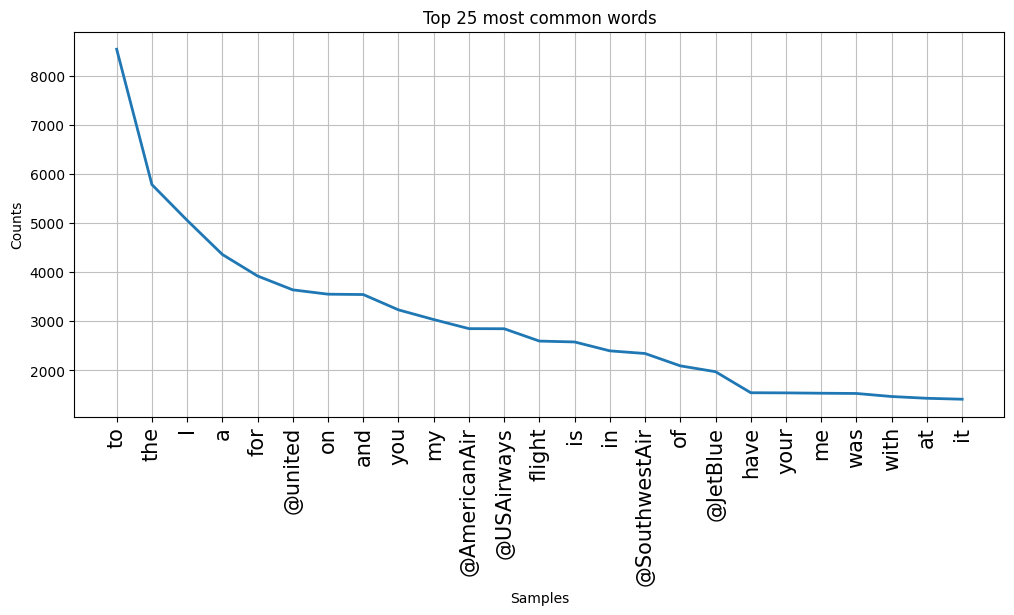

In [ ]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()


## Plot for Cleaned Tweets

In [ ]:
# Write the code for plotting the cleaned tweets
all_words = []
for t in data['cleaned_tweets_w/o_SW']:
    all_words.extend(t.split())

print(all_words[:50])

['what', 'said', 'plus', 'you', 'have', 'added', 'commercial', 'to', 'the', 'experience', 'tacky', 'i', 'did', 'not', 'today', 'must', 'mean', 'i', 'need', 'to', 'take', 'another', 'trip', 'it', 'is', 'really', 'aggressive', 'to', 'blast', 'obnoxious', 'entertainment', 'in', 'your', 'guest', 'face', 'amp', 'they', 'have', 'little', 'recourse', 'and', 'it', 'is', 'a', 'really', 'big', 'bad', 'thing', 'about', 'it']


In [ ]:
len(set(all_words)) # this is the number of unique words in the list

10239

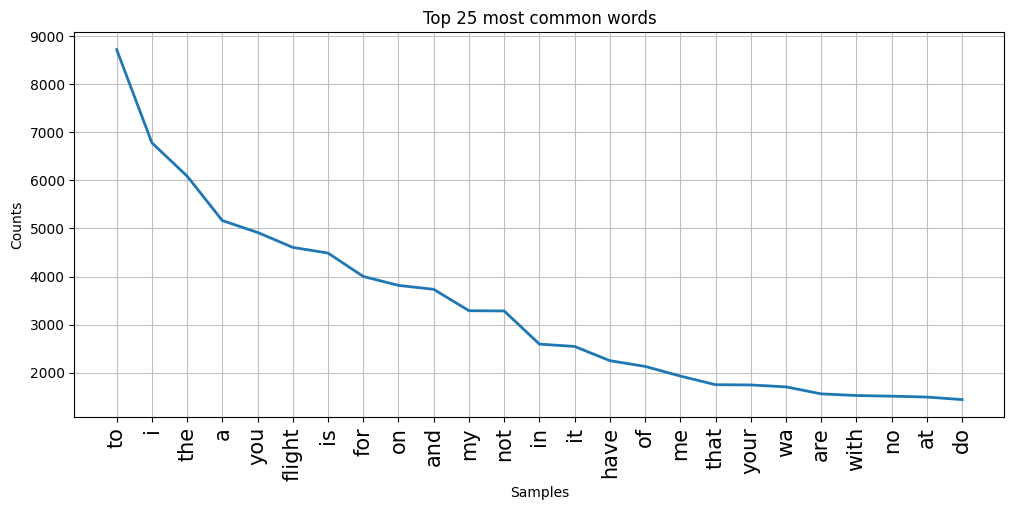

In [ ]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()


In [ ]:
# prompt: 10 random numbers using numpy

import numpy as np
print(np.random.randint(1, 10, size=(10)))


[2 9 1 2 2 2 6 7 8 8]


## DV After applying Stop words

In [ ]:
type(combined_stopwords)

NameError: ignored

In [ ]:
def tweet_cleaner_with_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    new_text = [token for token in new_text.split() if token not in combined_stopwords]

    new_text = [token for token in new_text if len(token)>2]

    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [ ]:
cleaned_tweets = list(data['text'].apply(tweet_cleaner_with_stopwords))
print(cleaned_tweets[:10])

['said ', 'plus added commercial experience tacky ', 'today mean need trip ', 'really aggressive blast obnoxious entertainment guest face amp little recourse ', 'really big bad thing ', 'seriously pay flight seat playing really bad thing flying ', 'yes nearly time fly ear worm away ', 'really missed prime opportunity men hat parody ', '', 'amazing arrived hour early good ']


In [ ]:
data.columns

Index(['airline_sentiment', 'airline_sentiment_confidence', 'airline', 'name',
       'text', 'cleaned_tweets_w/o_SW'],
      dtype='object')

In [ ]:
data['cleaned_tweets_with_SW'] = cleaned_tweets
data.head()

,airline_sentiment,airline_sentiment_confidence,airline,name,text,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,neutral,1.0000,Virgin America,cairdin,@VirginAmerica What @dhepburn said.,what said,said
1,positive,0.3486,Virgin America,jnardino,@VirginAmerica plus you've added commercials to the experience... tacky.,plus you have added commercial to the experience tacky,plus added commercial experience tacky
2,neutral,0.6837,Virgin America,yvonnalynn,@VirginAmerica I didn't today... Must mean I need to take another trip!,i did not today must mean i need to take another trip,today mean need trip
3,negative,1.0000,Virgin America,jnardino,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",it is really aggressive to blast obnoxious entertainment in your guest face amp they have little recourse,really aggressive blast obnoxious entertainment guest face amp little recourse
4,negative,1.0000,Virgin America,jnardino,@VirginAmerica and it's a really big bad thing about it,and it is a really big bad thing about it,really big bad thing


['said', 'plus', 'added', 'commercial', 'experience', 'tacky', 'today', 'mean', 'need', 'trip', 'really', 'aggressive', 'blast', 'obnoxious', 'entertainment', 'guest', 'face', 'amp', 'little', 'recourse', 'really', 'big', 'bad', 'thing', 'seriously', 'pay', 'flight', 'seat', 'playing', 'really', 'bad', 'thing', 'flying', 'yes', 'nearly', 'time', 'fly', 'ear', 'worm', 'away', 'really', 'missed', 'prime', 'opportunity', 'men', 'hat', 'parody', 'amazing', 'arrived', 'hour']


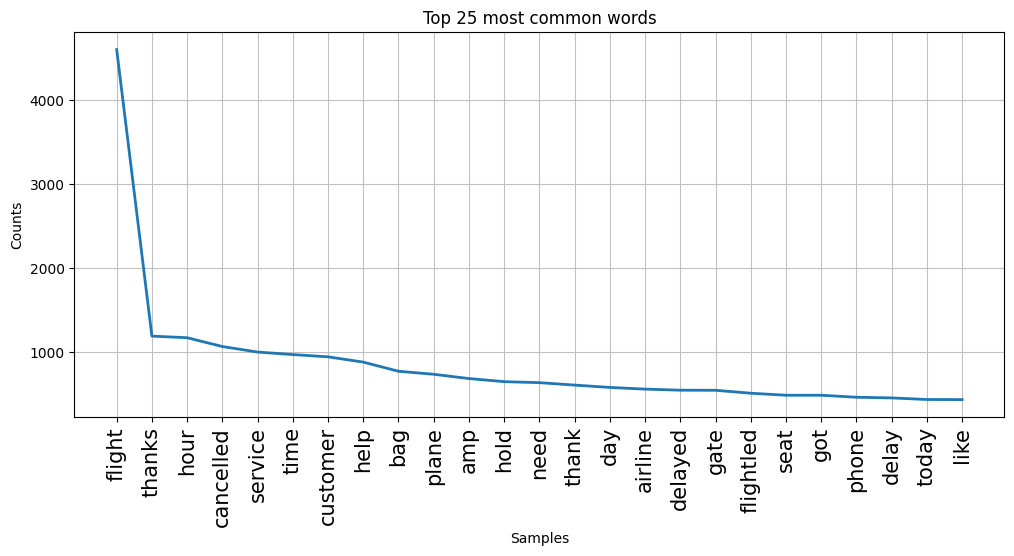

In [ ]:
all_words = []
for t in data['cleaned_tweets_with_SW']:
    all_words.extend(t.split())

print(all_words[:50])

# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [ ]:
domain_stopwords = ['phone', 'mobile', 'twitter', 'rt', 'com', 'follow']
final_stopwords = domain_stopwords + list(combined_stopwords)

In [ ]:
# HW: re-do the cleaner function to include final_stopwords
# and re-plot and see what more come up!

In [ ]:
data.head()

,airline_sentiment,airline_sentiment_confidence,airline,name,text,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,neutral,1.0000,Virgin America,cairdin,@VirginAmerica What @dhepburn said.,what said,said
1,positive,0.3486,Virgin America,jnardino,@VirginAmerica plus you've added commercials to the experience... tacky.,plus you have added commercial to the experience tacky,plus added commercial experience tacky
2,neutral,0.6837,Virgin America,yvonnalynn,@VirginAmerica I didn't today... Must mean I need to take another trip!,i did not today must mean i need to take another trip,today mean need trip
3,negative,1.0000,Virgin America,jnardino,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",it is really aggressive to blast obnoxious entertainment in your guest face amp they have little recourse,really aggressive blast obnoxious entertainment guest face amp little recourse
4,negative,1.0000,Virgin America,jnardino,@VirginAmerica and it's a really big bad thing about it,and it is a really big bad thing about it,really big bad thing


# 4. Bag of Words Model (Feature Extraction)

- Countvectorizer
- TF-IDF Vectorizer

In [ ]:
data.shape

(14640, 4)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()
CV_features = CV.fit_transform(data['cleaned_tweets_w/o_SW'])


KeyError: ignored

In [ ]:
CV_features.shape

NameError: ignored

In [ ]:
CV_features[0]

<1x10213 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [ ]:
# df = data.copy()
# df.columns = ['label', 'cleaned_tweets_incl_SW', 'cleaned_tweets_SW_removed', 'cleaned_tweets_SW_removed_len_gt2']
# df.to_pickle('cleaned_tweets.pkl')
# df.to_csv('cleaned_tweets', index=False)

In [ ]:
type(CV_features[0])  # each row is a compressed spare row

scipy.sparse._csr.csr_matrix

In [ ]:
CV_features[0].todense()  # decompressing the CSR data

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
import pandas as pd
df = pd.DataFrame(CV_features.todense() )
df
# Document-Term-Matrix X = [N x p ]
# N = no. of documentns
# p = no. of unique words in the vocab!!# this is your D

,0,1,2,3,4,5,6,7,8,9,...,10203,10204,10205,10206,10207,10208,10209,10210,10211,10212
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.size/1e6  # these many elements/numbers are presnt in the df

149.51832

In [ ]:
import numpy as np
np.count_nonzero(df)

213139

In [ ]:
100*np.count_nonzero(df)/df.size # percent of the non-zero elements i nthe df

0.14255042459011044

In [ ]:
!pip install --upgrade scikit-learn
# create a CountVectorizer object
cv = CountVectorizer()

# fit and transform the data using CountVectorizer
X = CV.fit_transform(df['cleaned_tweets']).toarray()

# get the feature names
features = cv.get_feature_names_out()

# create a DataFrame from the bag of words representation
df_bow = pd.DataFrame(X, columns=features)

print(CV.get_feature_names()[:50])  # these the vocab words

KeyError: ignored

In [ ]:
 CV.get_feature_names_out()[:50]  # these the vocab words

array(['aa', 'aaaand', 'aaadvantage', 'aaalwayslate', 'aadavantage',
       'aadelay', 'aadv', 'aadvantage', 'aafail', 'aal', 'aaron',
       'aateam', 'ab', 'aback', 'abandon', 'abandoned', 'abandonment',
       'abassinet', 'abbreve', 'abc', 'abcletjetbluestreamfeed',
       'abcnews', 'abducted', 'abi', 'ability', 'able', 'aboard',
       'aboout', 'abounds', 'about', 'above', 'abq', 'abroad', 'absolute',
       'absolutely', 'absorb', 'absorber', 'absoulutely', 'absurd',
       'absurdity', 'absurdly', 'abundance', 'abuse', 'abused', 'abysmal',
       'ac', 'acarl', 'acc', 'accelerate', 'accept'], dtype=object)

In [ ]:
# len(CV.get_feature_names_out())
#len(CV.get_feature_names())
len(CV.get_feature_names_out())

10213

In [ ]:
CV_features[10].todense()  # these are numbers corresponding to the 11th tweet

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [ ]:
CV.inverse_transform(np.asarray(CV_features[10].todense()))  # actual words in the 10th tweet

[array(['among', 'because', 'death', 'did', 'is', 'know', 'leading', 'of',
        'second', 'suicide', 'teen', 'that', 'the', 'you'], dtype='<U35')]

# 5. Model building

## Hyper parameter tuning of the LR1 model

In [ ]:
# print(CV_pipe['CV'].vocabulary_)

# 6. LR Model without vs with stop_words ??

# 7. TF-IDF Vector BoW Model + Logistic Regression

# 8. Dimesionality Reduction

# 9. N-Gram Models

In [ ]:
data.to_pickle("tweets_cleaned.pkl")

[CV] END ............................................C=1e-05; total time=   0.0s
[CV] END .............................C=0.050010000000000006; total time=   0.0s
[CV] END .............................C=0.050010000000000006; total time=   0.0s
[CV] END ..........................................C=0.10001; total time=   0.0s
[CV] END ..........................................C=0.10001; total time=   0.0s
[CV] END ..............................C=0.15001000000000003; total time=   0.0s
[CV] END ..............................C=0.20001000000000002; total time=   0.0s
[CV] END ..............................C=0.20001000000000002; total time=   0.0s
[CV] END ..............................C=0.30001000000000005; total time=   0.0s
[CV] END ..............................C=0.35001000000000004; total time=   0.0s
[CV] END ..........................................C=0.45001; total time=   0.0s
[CV] END ..........................................C=0.55001; total time=   0.0s
[CV] END ...................

In [ ]:
import pickle
from tensorflow.keras.models import load_model

# Load the Keras model from the .h5 file
keras_model = load_model('/content/c1_lstm_model_acc_0.864 (1).h5')

# Save the loaded model using pickle
with open('LSTM_MODEL.pkl', 'wb') as model_file:
    pickle.dump(keras_model, model_file)


OSError: No file or directory found at /content/c1_lstm_model_acc_0.864 (1).h5